# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM

library(funFEM)
data(velib)
#help("velib")

Warning message:
"package 'funFEM' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.2"Loading required package: fda
Warning message:
"package 'fda' was built under R version 3.6.3"Loading required package: splines
Loading required package: Matrix
Loading required package: fds
Warning message:
"package 'fds' was built under R version 3.6.3"Loading required package: rainbow
Warning message:
"package 'rainbow' was built under R version 3.6.3"Loading required package: pcaPP
Warning message:
"package 'pcaPP' was built under R version 3.6.3"Loading required package: RCurl
Warning message:
"package 'RCurl' was built under R version 3.6.3"
Attaching package: 'fda'

The following object is masked from 'package:graphics':

    matplot

Loading required package: elasticnet
Warning message:
"package 'elasticnet' was built under R version 3.6.3"Loading required package: lars
Loaded lars 1.2



In [2]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

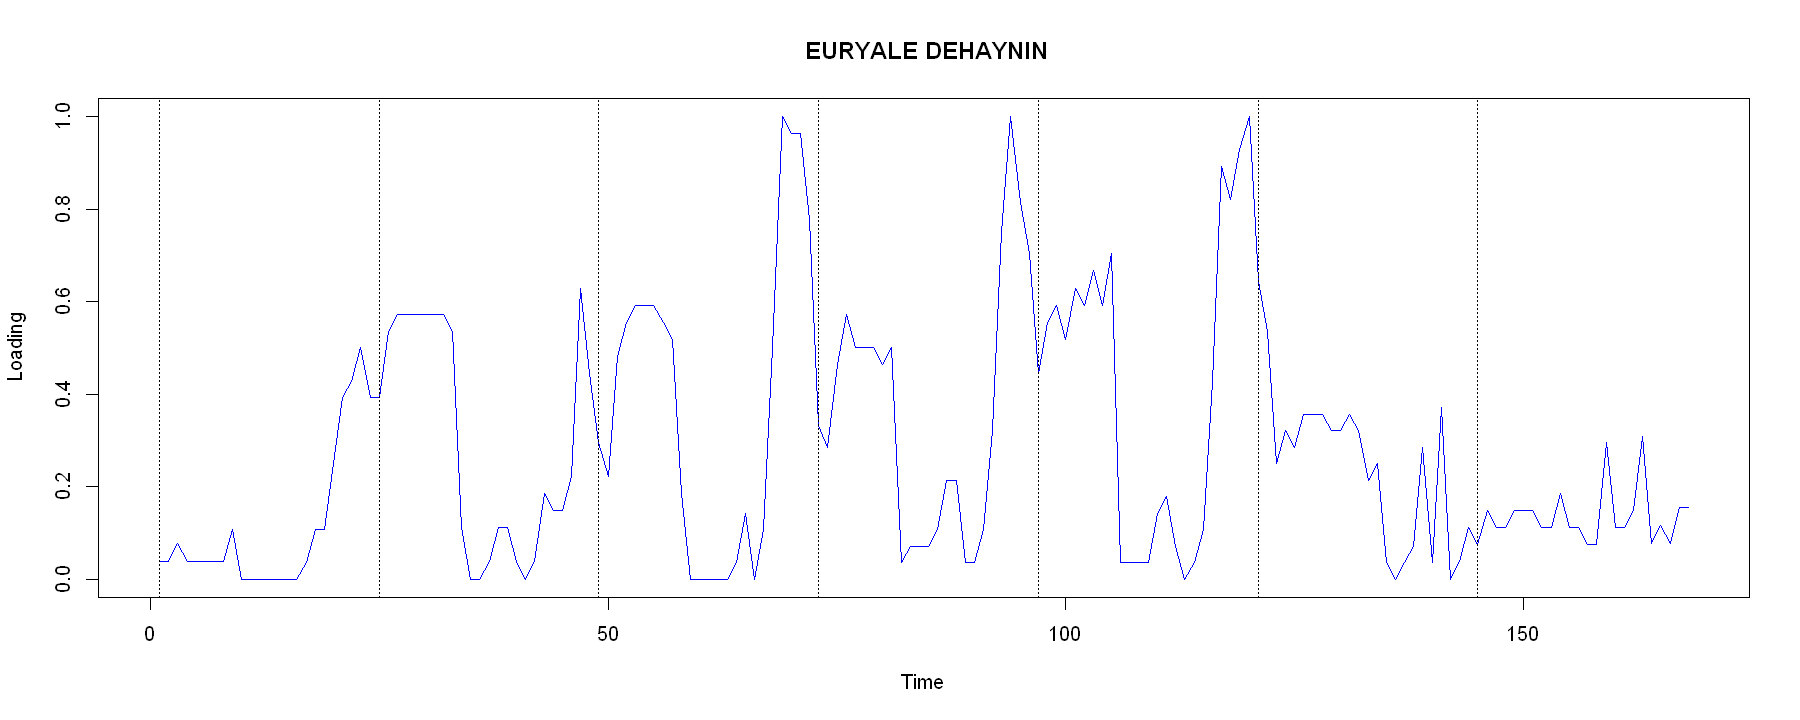

In [3]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [4]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
rownames(x) <- 1:nrow(x)

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.
5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

# Principal component analysis

Some ideas :

1. Perform a PCA with package FactoMineR. Should the data be scaled?
2. Plot the percentage of variance explained by the first 15 components, as well as a boxplot of the coordinates of the indivuals on the 15 first principal axis. How many components can be kept?
3. Plot the coordinates of the first 4 principal components on different graphs. Interpret the result (remember that the original variables are time steps).
4. Plot the circle of correlation. Interpret the result.
5. Plot the individuals on the plan spanned by the first two coordinates. Interpret the result.
6. Add the information brought by the variable qualitative variable 'bonus', indicating whether a station is located on a hill or not. In particular, where are located these stations on the graph of individuals? Is it surprising?
7. Implement questions 1-6 in Python. For that, you can have a look at the notebook on MARS, of https://github.com/wikistat/Exploration/

In [5]:
library(FactoMineR)

velib.pca <- PCA(x, scale.unit=F, graph=F)

Warning message:
"package 'FactoMineR' was built under R version 3.6.2"

In [8]:
library(factoextra)

fviz_eig(velib.pca, addlabels=T)

ERROR: Error in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]): namespace 'dplyr' 0.8.4 is already loaded, but >= 1.0.0 is required


In [7]:
install.packages("dplyr")

Installing package into 'C:/Users/luis_/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\luis_\Documents\R\win-library\3.6\00LOCK\dplyr\libs\x64\dplyr.dll  a C:\Users\luis_\Documents\R\win-library\3.6\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\luis_\AppData\Local\Temp\RtmpuOEP9K\downloaded_packages
